In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [9]:
def visualize_bounding_boxes(image_path, label_path):
    image = Image.open(image_path)
    image = np.array(image)
    height, width = image.shape[:2]

    # Load the labels
    with open(label_path, 'r') as f:
        labels = f.readlines()

    # Parse the labels
    bboxes = []
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.split())
        x_center *= width
        y_center *= height
        box_width *= width
        box_height *= height
        x_min = int(x_center - box_width / 2)
        y_min = int(y_center - box_height / 2)
        x_max = int(x_center + box_width / 2)
        y_max = int(y_center + box_height / 2)
        bboxes.append((class_id, x_min, y_min, x_max, y_max))

    channels_names = ['T1', 'T2', 'T2S']
    plt.figure(figsize=(15, 5))
    
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(image[:,:,i], cmap='gray')
        plt.axis('off')
        # plt.title(channels_names[i])
        for bbox in bboxes:
            class_id, x_min, y_min, x_max, y_max = bbox
            color = 'red' if class_id == 0 else 'blue'
            rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                linewidth=1, edgecolor=color, facecolor='none')
            plt.gca().add_patch(rect)
            # plt.text(x_min, y_min - 5, f'Class {int(class_id)}', color=color, fontsize=5)

    plt.tight_layout()
    plt.show()

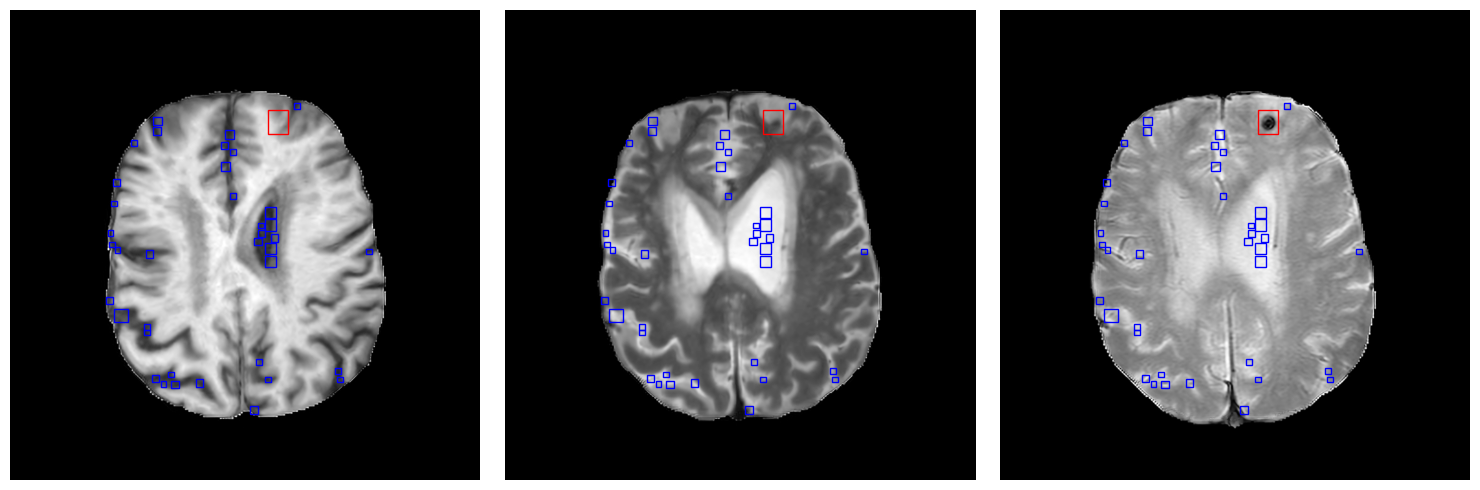

In [10]:
# Example usage
# uid = "4817777"
# slice_num = "25"
# root_path = "/media/Datacenter_storage/Ji/brain_mri_valdo_mayo/mayo_yolo_all_sequence"
# image_path = f"{root_path}/images/test/{uid}_{slice_num}.png"
# label_path = f"{root_path}/csf_labels/test/{uid}_{slice_num}.txt"

# Example usage
uid = "4817777"
slice_num = "30"
root_path = "/media/Datacenter_storage/PublicDatasets/MAYO_cerebral_microbleeds/mayo_allsequence_png_GAN_csf"
image_path = f"{root_path}/images/test/{uid}_{slice_num}.png"
label_path = f"{root_path}/labels/test/{uid}_{slice_num}.txt"

visualize_bounding_boxes(image_path, label_path)